# Survival Prediction on the Titanic Dataset

## Importing the Necessary Libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,accuracy_score,precision_score,f1_score
import inspect
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Titanic-Dataset.csv")
original_data = data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering

**Let us drop the unwanted features in the dataset**

In [3]:
data = data.drop(columns = ["PassengerId","Name","Ticket","Cabin"],axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Now the Unwanted Data Features have been Droped**

***Now we should Check whether the Dataset has any empty Values......***

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**It is clear to see that there is 177 missing values in the Age feature and the 2 values are missing in the Embarked...Let us fix that**

In [10]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Now it is clear that there is no missing values in any of the Feature in our Dataset**

**Let us display the overview of our Dataset**

In [14]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Preprocessing the Data

In [17]:
scaler = MinMaxScaler()
data["Age"] = scaler.fit_transform(data[["Age"]])
scaler = StandardScaler()
data["Fare"] = scaler.fit_transform(data[["Fare"]])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,1,0,-0.502445,S
1,1,1,female,0.472229,1,0,0.786845,C
2,1,3,female,0.321438,0,0,-0.488854,S
3,1,1,female,0.434531,1,0,0.420730,S
4,0,3,male,0.434531,0,0,-0.486337,S


In [19]:
data = pd.get_dummies(data,columns = ["Sex","Embarked"],drop_first = True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,-0.502445,True,False,True
1,1,1,0.472229,1,0,0.786845,False,False,False
2,1,3,0.321438,0,0,-0.488854,False,False,True
3,1,1,0.434531,1,0,0.420730,False,False,True
4,0,3,0.434531,0,0,-0.486337,True,False,True


**Lets us confirm that our Dataset Only contains the Numerical values without the objects**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


**Let us Visulaize the relationsip between the Dependent and the Independent variables of our Dataset**

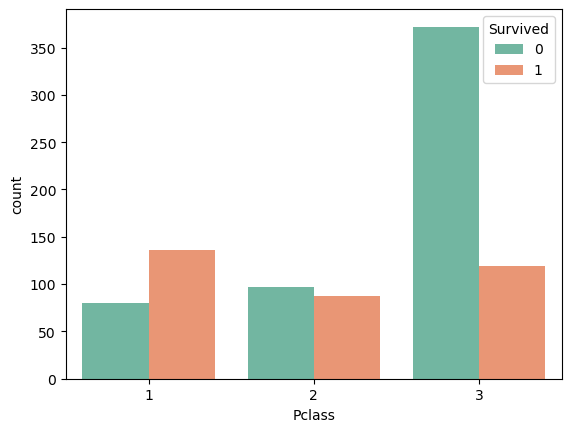

In [25]:
sns.countplot(data=data,x = "Pclass",hue = "Survived",palette = 'Set2')
plt.show()

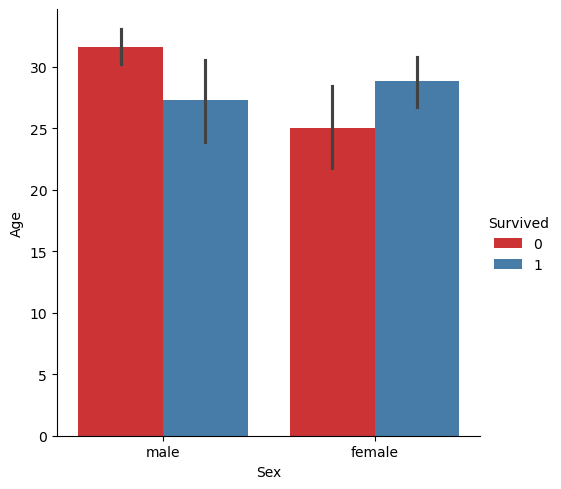

In [27]:
sns.catplot (data=original_data,x = "Sex",hue = "Survived",y ='Age',palette = 'Set1',kind = 'bar')

In [29]:
linear_models = [
("Linear Regression",LinearRegression),
("Logistic Regression",LogisticRegression)
]
Classifiers = [
    ("Random Forest",RandomForestClassifier),
    ("Ada Boost",AdaBoostClassifier)
]

**Let us know about the Parameters of the Linear and the Logistic Regressors.**

In [32]:
def display_params(estimator):
    signature = inspect.signature(estimator)
    print(estimator)
    for params in signature.parameters.values():
        print(f"{params.name}:{params.default}")
    print("-"*40)
for name,model in linear_models:
    display_params(model)

<class 'sklearn.linear_model._base.LinearRegression'>
fit_intercept:True
copy_X:True
n_jobs:None
positive:False
----------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
penalty:l2
dual:False
tol:0.0001
C:1.0
fit_intercept:True
intercept_scaling:1
class_weight:None
random_state:None
solver:lbfgs
max_iter:100
multi_class:deprecated
verbose:0
warm_start:False
n_jobs:None
l1_ratio:None
----------------------------------------


In [34]:
for name,model in Classifiers:
    display_params(model)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
n_estimators:100
criterion:gini
max_depth:None
min_samples_split:2
min_samples_leaf:1
min_weight_fraction_leaf:0.0
max_features:sqrt
max_leaf_nodes:None
min_impurity_decrease:0.0
bootstrap:True
oob_score:False
n_jobs:None
random_state:None
verbose:0
warm_start:False
class_weight:None
ccp_alpha:0.0
max_samples:None
monotonic_cst:None
----------------------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
estimator:None
n_estimators:50
learning_rate:1.0
algorithm:SAMME.R
random_state:None
----------------------------------------


**Now we got the parameters and let us find the best Parameters That gives the best Optimal Soluctions**

# Hyper Parameter Tuning

### Hyperparameter Tuning for Linear Regression Model

In [39]:
x=data.drop("Survived",axis = 1)
y = data["Survived"]
parameters = {
    'fit_intercept':[True,False],
    'copy_X':[True,False],
    'n_jobs': [None] + list(range(1, 12)),
    'positive':[False,True]
}
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 4)
lin_model = LinearRegression()
grid_search = GridSearchCV(lin_model,parameters,cv = 5,scoring = 'accuracy',n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameters = grid_search.best_params_ 
best_score = grid_search.best_score_ 
print(f"The Best Parameters: {best_parameters}") 
print(f"Best Accuracy: {best_score}")

The Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best Accuracy: nan


C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


**Let us code a function that takes the sample inputs from the user and takes as the data and predicts whether The Passenger is Survived or Dead**

**Now Let us change the Columns of the Name for Convinience**

In [43]:
data.columns = ["Survived","Passenger_Class","Age","Count_of_sibilings_and_spouce","count_of_parents_and_children","Fare","Male","Embarked_from_Queenstown","Embarked_from_Southampton"]

In [76]:
fare_min = data["Fare"].min()
fare_max = data["Fare"].max()
fare_scaler = MinMaxScaler(feature_range=(0, 1))
fare_scaler.fit(np.array([fare_min, fare_max]).reshape(-1, 1))
def check():
    print("Enter input values for the given features: ")
    array = []
    Passenger_Class = int(input("Enter the class of the Passenger that They have Booked: "))
    Age = int(input("Enter the age of the Passenger: "))
    Count_of_siblings_and_spouse = int(input("Enter the Count of the passenger's Sibling and Spouse that they have also travelled with them: "))
    count_of_parents_and_children = int(input("Enter the Count of the passenger's Parent and Children that they have also travelled with them: "))
    Fare = float(input("Enter the Fare of the Ticket of the Passenger that they have travelled: "))
    Fare = fare_scaler.transform(np.array([[Fare]]))[0][0]
    Male = int(input("If the passenger is Male, write '1'; otherwise, '0': ").strip())
    Embarked_from_Queenstown = int(input("Whether the Passenger Embarked from Queenstown (1 for Yes, 0 for No): "))
    Embarked_from_Southampton = int(input("Whether the Passenger Embarked from Southampton (1 for Yes, 0 for No): "))
    array.extend([Passenger_Class, Age, Count_of_siblings_and_spouse, count_of_parents_and_children, Fare, Male, Embarked_from_Queenstown, Embarked_from_Southampton]) 
    array = np.asarray(array, dtype=np.float32).reshape(1, -1)
    prediction = model.predict(array)
    print(prediction)
    print(f"Passenger Class = {Passenger_Class} \n"
      f"Age = {Age} \n"
      f"Count_of_siblings_and_spouse = {Count_of_siblings_and_spouse} \n"
      f"count_of_parents_and_children = {count_of_parents_and_children} \n"
      f"Fare = {fare_scaler.inverse_transform(np.array([[Fare]]))[0][0]} \n"
      f"Male = {Male} \n"
      f"Embarked_from_Queenstown = {Embarked_from_Queenstown} \n"
      f"Embarked_from_Southampton = {Embarked_from_Southampton}")

    if prediction == 1:
        print("Based on the values given, the Passenger has Survived from the Titanic Disaster.")
    else:
        print("Based on the values given, the Passenger has Unfortunately not Survived in the Titanic Disaster.")

**So we Got the Best Parameters so we can apply this parameters**

In [79]:
model = LinearRegression(
    fit_intercept= True, copy_X= True, n_jobs= None, positive= False
)
model.fit(x_train,y_train)
y_pred_lin = model.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_lin)
print(f"Mean Squared Error: {mse}")
check()

Mean Squared Error: 0.12967317999626324
Enter input values for the given features: 


Enter the class of the Passenger that They have Booked:  1
Enter the age of the Passenger:  67
Enter the Count of the passenger's Sibling and Spouse that they have also travelled with them:  1
Enter the Count of the passenger's Parent and Children that they have also travelled with them:  2
Enter the Fare of the Ticket of the Passenger that they have travelled:  146
If the passenger is Male, write '1'; otherwise, '0':  1
Whether the Passenger Embarked from Queenstown (1 for Yes, 0 for No):  1
Whether the Passenger Embarked from Southampton (1 for Yes, 0 for No):  0


[-28.02855223]
Passenger Class = 1 
Age = 67 
Count_of_siblings_and_spouse = 1 
count_of_parents_and_children = 2 
Fare = 146.0 
Male = 1 
Embarked_from_Queenstown = 1 
Embarked_from_Southampton = 0
Based on the values given, the Passenger has Unfortunately not Survived in the Titanic Disaster.


C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Now let us check for the Other Linear Model Logistic Regression to check the accuracy and the performance of the model**

*_Here we have two penalties l1 and l2 some parameters are incompatible with the others so we have two dictionaries l1 and l2 to avoid the errors_*

In [72]:
parameters = {
    'penalty': ['l2'], 
    'tol': [1e-4, 1e-3],
    'C': [0.01, 0.1, 1.0],
    'fit_intercept': [True, False],
    'solver': ['lbfgs', 'sag', 'saga'],  
    'max_iter': [100, 200],
    'multi_class': ['auto'],
    'n_jobs': [-1]
}
parameters_liblinear = {
    'penalty': ['l1', 'l2'],
    'dual': [False],
    'tol': [1e-4, 1e-3],
    'C': [0.01, 0.1, 1.0],
    'fit_intercept': [True, False],
    'solver': ['liblinear'],  
    'max_iter': [100, 200],
    'multi_class': ['auto'],
    'n_jobs': [-1]
}
model = LogisticRegression()
grid_search = GridSearchCV(model, [parameters, parameters_liblinear], cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print(f"The Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_score}")

The Best Parameters: {'C': 1.0, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
Best Accuracy: 0.7888452474469756


C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [73]:
model = LogisticRegression( 
    C=best_parameters['C'], 
    fit_intercept=best_parameters['fit_intercept'], 
    max_iter=best_parameters['max_iter'], 
    multi_class=best_parameters['multi_class'], 
    n_jobs=best_parameters['n_jobs'], 
    penalty=best_parameters['penalty'], 
    solver=best_parameters['solver'], 
    tol=best_parameters['tol'] 
)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
check()

C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.820627802690583
Enter input values for the given features: 


Enter the class of the Passenger that They have Booked:  3
Enter the age of the Passenger:  56
Enter the Count of the passenger's Sibling and Spouse that they have also travelled with them:  0
Enter the Count of the passenger's Parent and Children that they have also travelled with them:  2
Enter the Fare of the Ticket of the Passenger that they have travelled:  111
If the passenger is Male, write '1'; otherwise, '0':  0
Whether the Passenger Embarked from Queenstown (1 for Yes, 0 for No):  1
Whether the Passenger Embarked from Southampton (1 for Yes, 0 for No):  0


[0]
Passenger Class = 3 
Age = 56 
Count_of_siblings_and_spouse = 0 
count_of_parents_and_children = 2 
Fare = 111.0 
Male = 0 
Embarked_from_Queenstown = 1 
Embarked_from_Southampton = 0
Based on the values given, the Passenger has Unfortunately not Survived in the Titanic Disaster.


C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Now we have completed the Linear Models by Using the LinearRegression and the LogisticRegression**

**Now let us move to the Classifiers. let us take the RandomTreeClassfier and the AdaBoostClassifier**

In [58]:
parameters={
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10],
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2], 
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False], 
    'n_jobs': [-1], 
    'random_state': [42] 
}
model = RandomForestClassifier()
grid_search = GridSearchCV(model,parameters,cv = 5,scoring = 'accuracy',n_jobs = -1)
grid_search.fit(x_train,y_train)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print(f"The Best Parameters are {best_parameters}")
print(f"The Best Scores are {best_score} ")

The Best Parameters are {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}
The Best Scores are 0.827864437212434 


**We could also calculate for all the parameters for the Random Forest but It would be very lengthy process for the Grid Search CV all the parameter values so for Now we are using the selective best parameter**

In [66]:
model = RandomForestClassifier(
    bootstrap= True, 
    criterion= 'entropy', 
    max_depth= 10,
    max_features= 'log2', 
    min_samples_leaf= 1,
    min_samples_split= 2,
    n_estimators= 50,
    n_jobs= -1,
    random_state= 42
)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy Score for the Random Forest Classifier is {accuracy}")
check()

The accuracy Score for the Random Forest Classifier is 0.8340807174887892
Enter input values for the given features: 


Enter the class of the Passenger that They have Booked:  1
Enter the age of the Passenger:  25
Enter the Count of the passenger's Sibling and Spouse that they have also travelled with them:  0
Enter the Count of the passenger's Parent and Children that they have also travelled with them:  1
Enter the Fare of the Ticket of the Passenger that they have travelled:  35
If the passenger is Male, write '1'; otherwise, '0':  1
Whether the Passenger Embarked from Queenstown (1 for Yes, 0 for No):  1
Whether the Passenger Embarked from Southampton (1 for Yes, 0 for No):  0


[0]
Passenger Class = 1 
Age = 25 
Count_of_siblings_and_spouse = 0 
count_of_parents_and_children = 1 
Fare = 35.0 
Male = 1 
Embarked_from_Queenstown = 1 
Embarked_from_Southampton = 0
Based on the values given, the Passenger has Unfortunately not Survived in the Titanic Disaster.


C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Now let us jump into the Ada Boost Classifier And Find the best Parameter to get more accuracy**

In [68]:
from sklearn.tree import DecisionTreeClassifier
parameters = { 'estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)], 
              'n_estimators': [50, 100, 200], 
              'learning_rate': [0.01, 0.1, 0.5, 1.0], 
              'algorithm': ['SAMME', 'SAMME.R'], 
              'random_state': [None, 42] 
             } 
model = AdaBoostClassifier()
grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy', n_jobs=4) 
grid_search.fit(x_train, y_train) 
best_param = grid_search.best_params_ 
best_score = grid_search.best_score_ 
print(f"The Best parameters are: {best_param}") 
print(f"The Best Accuracy Score is {best_score}") 
model = AdaBoostClassifier(**best_param) 
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for AdaBoost: {accuracy} ")
check()

C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The Best parameters are: {'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 200, 'random_state': None}
The Best Accuracy Score is 0.815856806194591


C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy for AdaBoost: 0.8565022421524664 
Enter input values for the given features: 


Enter the class of the Passenger that They have Booked:  2
Enter the age of the Passenger:  70
Enter the Count of the passenger's Sibling and Spouse that they have also travelled with them:  0
Enter the Count of the passenger's Parent and Children that they have also travelled with them:  2
Enter the Fare of the Ticket of the Passenger that they have travelled:  72
If the passenger is Male, write '1'; otherwise, '0':  0
Whether the Passenger Embarked from Queenstown (1 for Yes, 0 for No):  0
Whether the Passenger Embarked from Southampton (1 for Yes, 0 for No):  1


[1]
Passenger Class = 2 
Age = 70 
Count_of_siblings_and_spouse = 0 
count_of_parents_and_children = 2 
Fare = 72.0 
Male = 0 
Embarked_from_Queenstown = 0 
Embarked_from_Southampton = 1
Based on the values given, the Passenger has Survived from the Titanic Disaster.


C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


# Therefore I have built a reliable predictive model for passenger survival, emphasizing key features like class, age, and fare. The project highlighted the power of data-driven analysis in historical contexts.